In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [25]:
filename = "Word2Vec/Word2vec_Vector_3_0.01_70.csv"
df = pd.read_csv(filename)
df.head()

,Berita,Label,Category_id,Word2Vec Vector
0,"['duga', 'laku', 'keras', 'anak', 'isa', 'baja...",orang asing,4,"[0.4209834635257721, 0.05459590628743172, 0.23..."
1,"['miris', 'anak', 'jakarta', 'korban', 'keras'...",keluarga,0,"[0.2606388032436371, 0.2641247510910034, 0.067..."
2,"['polisi', 'aman', 'oknum', 'guru', 'sd', 'sin...",tenaga pendidik,2,"[0.21270155906677246, 0.3647041320800781, 0.25..."
3,"['anak', 'tenggelam', 'catat', 'hitam', 'keras...",keluarga,0,"[0.33772405982017517, 0.3632403016090393, 0.18..."
4,"['sangka', 'bullying', 'sma', 'internasional',...",teman,3,"[0.2748887538909912, 0.21491208672523499, 0.00..."


## Split Data (80:20)

In [26]:
# split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [19]:
train_df.head()

,Berita,Label,Category_id
969,Ayah di Pinrang Ditangkap Usai Sandera dan Anc...,keluarga,0
678,"Dugaan Anak Dibawa Orang Tak Dikenal, Attila S...",orang asing,4
894,DP3A Lakukan Pendampingan Korban dan Pelaku Pe...,teman,3
33,Inara Rusli Bawa Kunci Bukti Dugaan Virgoun La...,keluarga,0
31,Viral Video Bocah Terikat di Tiang Listrik Pek...,orang asing,4


In [20]:
test_df.head()

,Berita,Label,Category_id
199,Ternyata Ini Bukan Pertama Kali Anak Selebgram...,pengasuh,1
789,"Perkosa 27 Gadis Remaja, Guru Ngaji di Senegal...",tenaga pendidik,2
174,Pemilik Daycare di Pekanbaru Jadi Tersangka Us...,pengasuh,1
467,Heboh Ayah Perkosa Anak Kandung di Deli Serdan...,keluarga,0
66,Terungkap Sadisnya Ayah di Sorong Bunuh-Kubur ...,keluarga,0


In [21]:
print("Shape Data Training: ", train_df.shape)
print("Shape Data Testing: ", test_df.shape)

Shape Data Training:  (780, 3)
Shape Data Testing:  (195, 3)


In [22]:
train_df.to_csv("Result/All_Process/Train_Data.csv", index=False)
test_df.to_csv("Result/All_Process/Test_Data.csv", index=False)

### See The Data

##### Bar Chart 1: Number of Train and Test Data

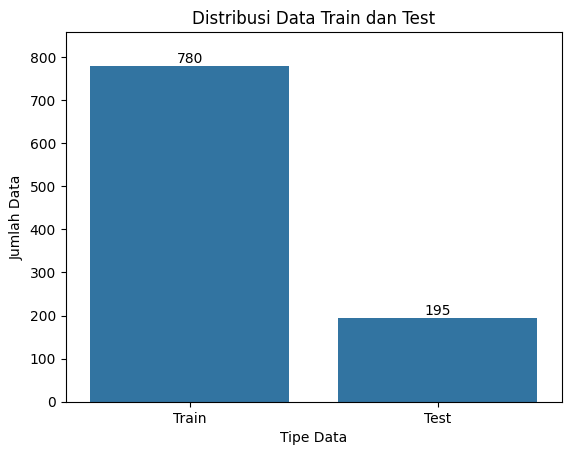

In [8]:

plt.figure()
bars = sns.barplot(x=['Train', 'Test'], y=[len(train_df), len(test_df)])

# Add text labels on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='black')

plt.xlabel("Tipe Data")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data Train dan Test")
plt.ylim(0, max(len(train_df), len(test_df)) * 1.1)  # Adjust ylim for visibility
plt.show()

##### Bar Chart 2: Number of Perpetrator Categories in Train and Test

<Figure size 1000x500 with 0 Axes>

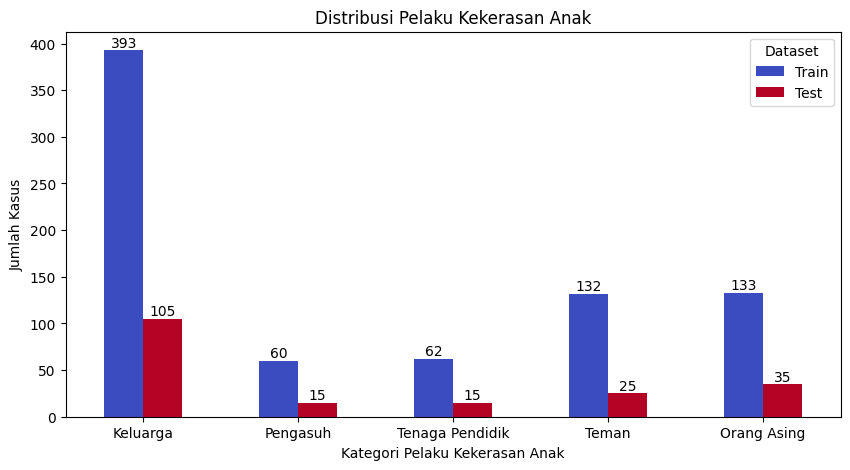

In [9]:
# Mapping Category_id to labels
category_labels = {
    0: "Keluarga",
    1: "Pengasuh",
    2: "Tenaga Pendidik",
    3: "Teman",
    4: "Orang Asing"
}

plt.figure(figsize=(10, 5))

# Assuming the perpetrator category is in a column named "perpetrator_category"
train_counts = train_df['Category_id'].value_counts()
test_counts = test_df['Category_id'].value_counts()

df_counts = pd.DataFrame({'Train': train_counts, 'Test': test_counts}).fillna(0)

ax = df_counts.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')

plt.xlabel("Kategori Pelaku Kekerasan Anak")
plt.ylabel("Jumlah Kasus")
plt.title("Distribusi Pelaku Kekerasan Anak")
plt.xticks(rotation=0)
plt.legend(title="Dataset")

# Change X-tick labels to category names
ax.set_xticklabels([category_labels[idx] for idx in df_counts.index])

# Add text labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.show()